In [1]:
import gc # garbage collector
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm # progress bar
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from pymongo import MongoClient
from sklearn.preprocessing import LabelEncoder

In [2]:
LISTE_MAJ = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
LISTE_MIN = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
LISTE_NBR = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

BATCH_SIZE = 256
EPOCHS = 10
ADD_NOM = "3_b" + str(BATCH_SIZE) + "_e" + str(EPOCHS)

In [3]:
# shape of the image : 50x50
# number of classes : 10 (0-9)

# Dataset_Nbr_test : 1_200_160
# Dataset_Nbr_train : 3_602_768
# Dataset_Nbr_validation : 1_200_992

# Get Data
---

- Récupération des données de la base de données
- formattage des données
- répartition des données

In [4]:
# Connexion à MongoDB
client = MongoClient("mongodb://localhost:27017/Scibio")  # Remplacez par l'URL de votre serveur MongoDB
db = client["Scribio"]  # Nom de la base de données

In [5]:
def fetch_data(nom_collection: str, nbr: int):
    collection = db[nom_collection]  # Nom de la collection
    documents = collection.find()
    print(f"fetch {nom_collection} OK !!!")

    images = []
    labels = []
    types = []
    
    # Parcours et transformation des photos avec barre de progression 
    with tqdm(total=nbr, desc="Proccessing" , position=0, leave=True) as pbar:
        for doc in documents:
            images.append(np.array(doc["Tableau_Pixels"], dtype=np.float32))
            labels.append(doc["Label"])
            types.append(doc["Type"])
            pbar.update(1) # Mettre à jour la barre de progression
            
    # return np.array(images), np.array(labels, dtype=str)
    return pd.DataFrame({"Labels": labels, "Types": types, "Images": images})

### Récupérations des données de toutes les collections
---

In [12]:
df_nbr_test = fetch_data("Dataset_Nbr_test", 1_200_160)
df_nbr_test = df_nbr_test.sample(frac=1).reset_index(drop=True)
print(df_nbr_test.shape)
df_nbr_test.head()
# Temps : 3m 3.3s

fetch Dataset_Nbr_test OK !!!


Proccessing: 100%|██████████| 1200160/1200160 [03:02<00:00, 6567.17it/s] 


(1200160, 3)


,Labels,Types,Images
0,3,Nbr,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,7,Nbr,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,Nbr,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,1,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [13]:
df_nbr_train = fetch_data("Dataset_Nbr_train", 3_602_768)
df_nbr_train = df_nbr_train.sample(frac=1).reset_index(drop=True)
print(df_nbr_train.shape)
df_nbr_train.head()
# Temps : 8m 39.0s

fetch Dataset_Nbr_train OK !!!


Proccessing: 100%|██████████| 3602768/3602768 [08:37<00:00, 6966.02it/s]


(3602768, 3)


,Labels,Types,Images
0,5,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,7,Nbr,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,9,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,9,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,5,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [14]:
df_nbr_validation = fetch_data("Dataset_Nbr_validation", 1_200_992)
df_nbr_validation = df_nbr_validation.sample(frac=1).reset_index(drop=True)
print(df_nbr_validation.shape)
df_nbr_validation.head()
# Temps : 6m 30.4s

fetch Dataset_Nbr_validation OK !!!


Proccessing: 100%|██████████| 1200992/1200992 [06:29<00:00, 3080.61it/s]


(1200992, 3)


,Labels,Types,Images
0,1,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,3,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,5,Nbr,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,6,Nbr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


### Données pour apprentissage du NN 'Get Nbr'
---

Préparation des données pour l'entrainement du réseau de neurones 'Get Nbr' qui permettra de classé les images selon le chiffre qui y est représenté.

In [ ]:
X_train_Nbr = np.array(df_nbr_train["Images"].tolist())
# Temps : 

In [ ]:
y_train_Nbr = np.array(df_nbr_train["Labels"].tolist())
# Temps : 

In [ ]:
X_test_Nbr = np.array(df_nbr_test["Images"].tolist())
# Temps : 

In [ ]:
y_test_Nbr = np.array(df_nbr_test["Labels"].tolist())
# Temps : 

In [ ]:
X_validation_Nbr = np.array(df_nbr_validation["Images"].tolist())
# Temps : 

In [ ]:
y_validation_Nbr = np.array(df_nbr_validation["Labels"].tolist())
# Temps : 

In [34]:
# Conversion des étiquettes en indices (si nécessaire)
label_encoder_Nbr = LabelEncoder()

y_train_Nbr_2 = label_encoder_Nbr.fit_transform(y_train_Nbr)  # Convertit les étiquettes (lettres/nombres) en indices numériques (nombre) (str => int)
y_test_Nbr_2 = label_encoder_Nbr.transform(y_test_Nbr)
y_validation_Nbr_2 = label_encoder_Nbr.transform(y_validation_Nbr)

In [35]:
# Correspondance indices ↔ labels
correspondance_Nbr = dict(enumerate(label_encoder_Nbr.classes_))
print(correspondance_Nbr)

# Liste des labels
labels_Nbr = list(correspondance_Nbr.values())
print(labels_Nbr)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [36]:
# Afficher quelques informations
print(f"Taille de X_train_Nbr: {X_train_Nbr.shape}, y_train_Nbr: {y_train_Nbr.shape}, y_train_Nbr_2: {y_train_Nbr_2.shape}")
print(f"Taille de X_test_Nbr: {X_test_Nbr.shape}, y_test_Nbr: {y_test_Nbr.shape}, y_test_Nbr_2: {y_test_Nbr_2.shape}")
print(f"Taille de X_validation_Nbr: {X_validation_Nbr.shape}, y_validation_Nbr: {y_validation_Nbr.shape}, y_validation_Nbr_2: {y_validation_Nbr_2.shape}")

Taille de X_train_Nbr: (225173, 2500), y_train_Nbr: (225173,), y_train_Nbr_2: (225173,)
Taille de X_test_Nbr: (75010, 2500), y_test_Nbr: (75010,), y_test_Nbr_2: (75010,)
Taille de X_validation_Nbr: (75062, 2500), y_validation_Nbr: (75062,), y_validation_Nbr_2: (75062,)


##### Suppression
---

Suppression des données pour l'apprentissage de 'Get Nbr' plus utilisées

In [ ]:
del df_nbr_test, df_nbr_train, df_nbr_validation
gc.collect()  # Force la collecte des objets non utilisés

# Get Nbr (NN)
---

Modèle ...

In [61]:
model_get_nbr = keras.Sequential([
    keras.layers.Input((625,)), # input layer : 2500 neurones (50x50 pixels)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # output layer : 10 neurones (0-9)
])

model_get_nbr.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
model_get_nbr.fit(
    X_train_Nbr, 
    y_train_Nbr_2, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(
        X_validation_Nbr, 
        y_validation_Nbr_2
    ),
    verbose=1
)

# Batch 32
# accuracy : 0.9325
# loss : 0.1897
# Temps : 6m 16.0s

# Batch 64
# accuracy : 0.9347
# loss : 0.1844
# Temps : 4m 16.6s

# Batch 128
# accuracy : 0.9343
# loss : 0.1834
# Temps : 1m 59.6s

# Batch 256
# accuracy : 0.9342
# loss : 0.1825
# Temps : 1m 16.2s

Epoch 1/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.8765 - loss: 0.3860 - val_accuracy: 0.9170 - val_loss: 0.2518
Epoch 2/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9210 - loss: 0.2352 - val_accuracy: 0.9224 - val_loss: 0.2258
Epoch 3/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.9254 - loss: 0.2170 - val_accuracy: 0.9241 - val_loss: 0.2272
Epoch 4/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9287 - loss: 0.2066 - val_accuracy: 0.9253 - val_loss: 0.2191
Epoch 5/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9294 - loss: 0.2024 - val_accuracy: 0.9278 - val_loss: 0.2150
Epoch 6/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9310 - loss: 0.1978 - val_accuracy: 0.9275 - val_loss: 0.2171
Epoch 7/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9325 - loss: 0.1913 - val_accuracy: 0.9281 - val_loss: 0.2158
Epoch 8/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9338 -

In [63]:
test_loss_nbr, test_acc_nbr = model_get_nbr.evaluate(X_test_Nbr, y_test_Nbr_2)
print(f"Test accuracy : {test_acc_nbr}") # Test accuracy : 
print(f"Test loss : {test_loss_nbr}") # Test loss : 
# Temps : 3.0s

2345/2345 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9247 - loss: 0.2256
Test accuracy : 0.9253299832344055
Test loss : 0.22489826381206512


In [64]:
# Sauvegarder le modèle
model_get_nbr.save("../models/Get_Nbr_v" + ADD_NOM + ".keras")  # Format keras (.keras)

In [65]:
y_predicted_Nbr = model_get_nbr.predict(X_test_Nbr)
y_predicted_Nbr[1]
# Temps : 3.4s

2345/2345 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


array([0.9999852 , 0.00764219, 0.9718231 , 0.07599138, 0.63383675,
       0.8662904 , 0.9781628 , 0.43026128, 0.9910955 , 0.99828786],
      dtype=float32)

In [66]:
# y_predicted_labels_Nbr = [correspondance_Nbr[np.argmax(i)] for i in y_predicted_Nbr]
y_predicted_labels_Nbr = [np.argmax(i) for i in y_predicted_Nbr]
y_predicted_labels_Nbr[:5]

[4, 0, 1, 5, 4]

Text(95.72222222222221, 0.5, 'Truth')

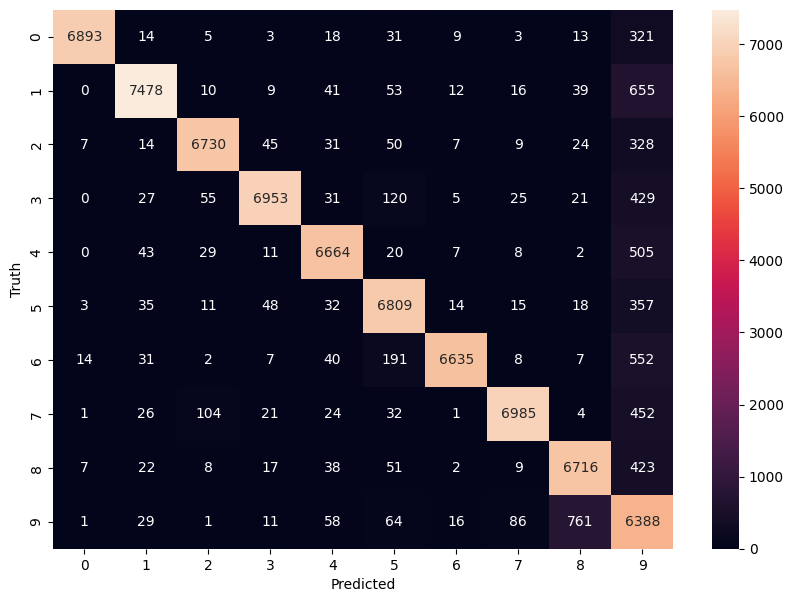

In [67]:
# Matrice de confusion
cm_Nbr = tf.math.confusion_matrix(labels=y_test_Nbr_2, predictions=y_predicted_labels_Nbr)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_Nbr, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')